In [47]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [48]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


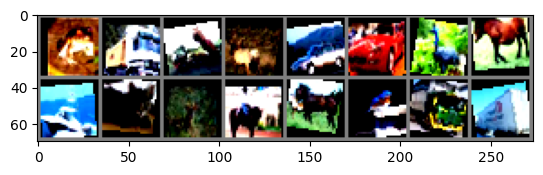

frog  truck truck deer  car   car   bird  horse ship  cat   deer  horse horse bird  truck truck


In [49]:
#function to show an image
def imshow(img):
    img = img /2 + 0.5
    npImg = img.cpu().numpy()
    plt.imshow(np.transpose(npImg, (1, 2, 0)))
    plt.show()
#get some random training images
detaiter = iter(trainloader)
images, labels = next(detaiter)

#show images 
imshow(torchvision.utils.make_grid(images.cpu()))

#print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [50]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

print(Net())

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on: ", device)

model = Net().to(device)

#Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

#Train the network

for epoch in range(20): #loop over the dataset
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0): 
        #get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #print statistic 
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            
    scheduler.step()

print('Finished Training')
        

Running on:  cuda
[1,  2000] loss: 2.177
[2,  2000] loss: 1.845
[3,  2000] loss: 1.437
[4,  2000] loss: 1.216
[5,  2000] loss: 1.103
[6,  2000] loss: 1.018
[7,  2000] loss: 0.969
[8,  2000] loss: 0.923
[9,  2000] loss: 0.902
[10,  2000] loss: 0.874
[11,  2000] loss: 0.711
[12,  2000] loss: 0.651
[13,  2000] loss: 0.622
[14,  2000] loss: 0.604
[15,  2000] loss: 0.592
[16,  2000] loss: 0.578
[17,  2000] loss: 0.567
[18,  2000] loss: 0.558
[19,  2000] loss: 0.547
[20,  2000] loss: 0.543
Finished Training


In [52]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cuda


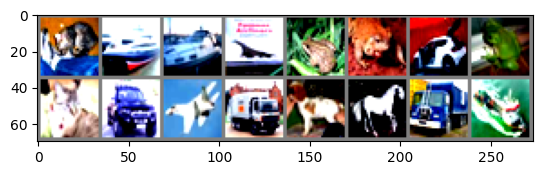

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 


In [53]:
detaiter = iter(testloader)
images, labels = next(detaiter)

images = images.to(device)
print(device)

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [54]:
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [55]:
outputs = model(images)

In [56]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))

Predicted:  cat   ship  ship  plane frog  frog  car   bird  cat   car   plane truck dog   horse truck ship 


In [57]:
correct = 0
total = 0

#since not training, no need to calculate gradient
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        #calculate outputs by running images through the network
        outputs = model(images)

        #class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 80 %


In [58]:
#prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

#again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        #collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] +=1

#print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 85.0 %
Accuracy for class: car   is 89.4 %
Accuracy for class: bird  is 66.2 %
Accuracy for class: cat   is 67.7 %
Accuracy for class: deer  is 74.0 %
Accuracy for class: dog   is 66.7 %
Accuracy for class: frog  is 86.3 %
Accuracy for class: horse is 89.0 %
Accuracy for class: ship  is 89.6 %
Accuracy for class: truck is 90.6 %
